In [158]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [159]:
df = pd.read_csv("./dataset.csv")
df.head(20)

,p,target,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16
0,1,no,0,0,0,0.000000,0,1,0,0.58970,17,2,0,1,1,0,0,1,0.41030
1,2,no,0,0,0,0.000000,0,1,0,0.90081,17,2,0,1,1,0,0,1,0.09919
2,3,no,0,0,0,0.000000,0,1,0,0.89853,17,2,0,1,1,0,0,1,0.10147
3,4,no,0,0,0,0.000000,0,1,0,0.64069,17,2,0,1,1,0,0,1,0.35931
4,5,no,0,0,0,0.000000,0,1,0,0.59837,17,2,0,1,1,0,0,1,0.40163
5,6,no,2,1,0,0.833333,0,2,0,0.65767,4,7,2,1,1,2,1,3,0.34233
6,7,no,9,1,0,0.814815,0,2,9,0.66566,4,7,9,1,1,2,1,3,0.33434
7,8,no,8,1,0,0.958333,0,2,8,0.41222,4,2,8,1,1,2,1,3,0.58778
8,9,no,138,1,0,0.007246,0,1,12,0.99744,3,3,138,1,1,1,1,2,0.00256
9,10,no,18,1,0,0.777778,0,2,6,0.58019,4,2,18,1,1,2,1,3,0.41981


In [160]:
df['p'].count()

1048575

In [161]:
df.describe().apply(lambda x: x.apply('{0:.3f}'.format))

,p,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16
count,1048575.000,1048575.000,1048575.000,1048575.000,1048575.000,1048575.000,1048575.000,1048575.000,1048575.000,1048575.000,1048575.000,1048575.000,1048575.000,1048575.000,1048575.000,1048575.000,1048575.000,1048575.000
mean,524288.000,8.502,0.919,0.157,0.519,1.381,1.245,4.221,0.743,12.483,3.394,9.299,0.721,0.721,1.484,2.300,2.165,0.257
std,302697.674,30.856,2.447,2.231,0.419,12.016,0.578,11.796,0.230,13.221,2.123,32.411,0.449,0.449,2.538,13.466,2.513,0.230
min,1.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000
25%,262144.500,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.577,6.000,2.000,0.000,0.000,0.000,0.000,0.000,1.000,0.051
50%,524288.000,0.000,1.000,0.000,0.615,0.000,1.000,0.000,0.796,9.000,2.000,1.000,1.000,1.000,2.000,1.000,2.000,0.204
75%,786431.500,4.000,1.000,0.000,0.967,1.000,1.000,4.000,0.949,14.000,6.000,5.000,1.000,1.000,2.000,2.000,3.000,0.423
max,1048575.000,255.000,255.000,255.000,1.000,255.000,8.000,255.000,1.000,238.000,7.000,255.000,1.000,1.000,255.000,510.000,256.000,1.000


In [162]:
samples_cnt = df.groupby('target').count()['p']
total_samples_cnt = samples_cnt.sum()

print(f'Marked, as \'no\': count = {samples_cnt["no"]}, percentage = {(samples_cnt["no"] * 100) / total_samples_cnt:.3f}%')
print(f'Marked, as \'yes\': count = {samples_cnt["yes"]}, percentage = {(samples_cnt["yes"] * 100) / total_samples_cnt:.3f}%')

Marked, as 'no': count = 1030822, percentage = 98.307%
Marked, as 'yes': count = 17753, percentage = 1.693%


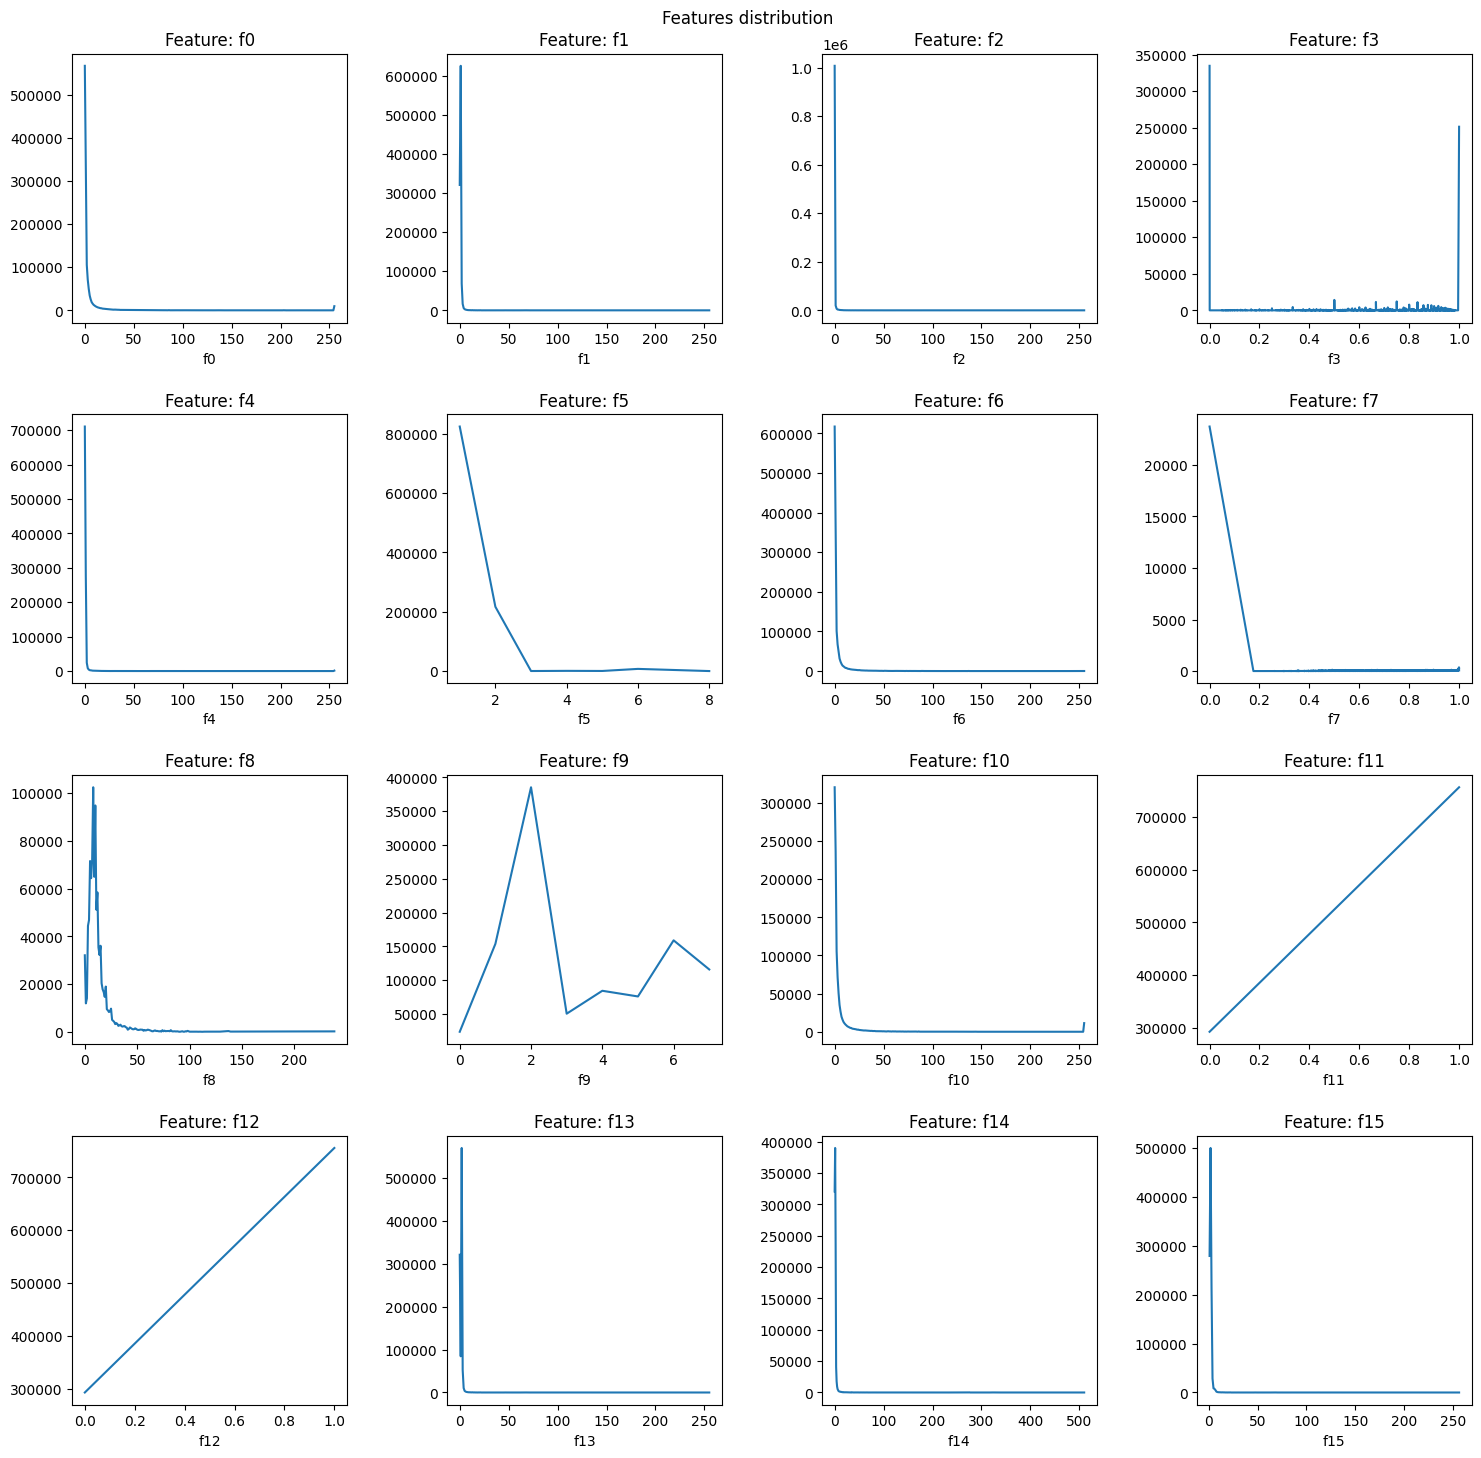

In [163]:
f_names = list(filter(lambda c: c[0] == 'f', df.columns))
plot_rows_count = 4
plot_columns_count = 4

fig, axes = plt.subplots(plot_rows_count, plot_columns_count)
fig.suptitle('Features distribution')
fig.tight_layout(pad=0.01)

for i in range(plot_rows_count):
    for j in range(plot_columns_count):
        f_name = f_names[i * plot_columns_count + j]
        axes[i, j].title.set_text(f'Feature: {f_name}')
        df.groupby(f_name).count()['p'].plot(ax=axes[i, j], figsize=(15, 15))

array([[<AxesSubplot: title={'center': 'f5'}>,
        <AxesSubplot: title={'center': 'f9'}>,
        <AxesSubplot: title={'center': 'f11'}>,
        <AxesSubplot: title={'center': 'f12'}>]], dtype=object)

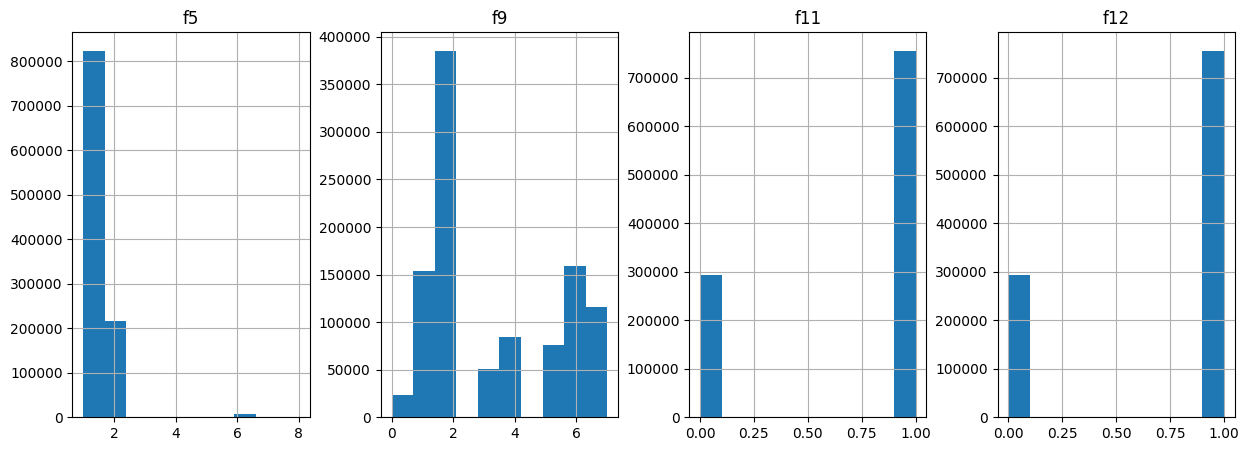

In [164]:
nominal_f_candidates_names = ['f5', 'f9', 'f11', 'f12']

df.hist(column=nominal_f_candidates_names, layout=(1, len(nominal_f_candidates_names)), figsize=(15, 5))